# 로지스틱 회귀

## 럭키백의 확률
### 데이터 준비하기

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.special import softmax
from scipy.special import expit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
fish = pd.read_csv('http://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [17]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [21]:
# pandas dataframe을 Numpy배열로 변환하는 메서드
# Numpy 배열은 고속 연산과 다양한 수학적 연산을 지원하기 때문
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [33]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [25]:
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [35]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [41]:
# 가장 근접한 3개의 이웃을 사용하여 분류 모델 생성
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [43]:
# .classes_는 모델이 예측할 수 있는 클래스들을 반환
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [47]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [51]:
# .predict_proba() : 주어진 입력 데이터에 대해 각 클래스에 속할 확률을 반환

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

#각 요소들이 무슨 값인지는 .classes_를 사용하여 확인
# ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [53]:
# test_scaled[3:4] : 즉  아래의 값에 대한  코드
# [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# kneighbors() 함수는 주어진 샘플에 대해 가장 가까운 이웃들을 찾는 함수 
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀
회귀라곤 하지만 실제로는 분류임

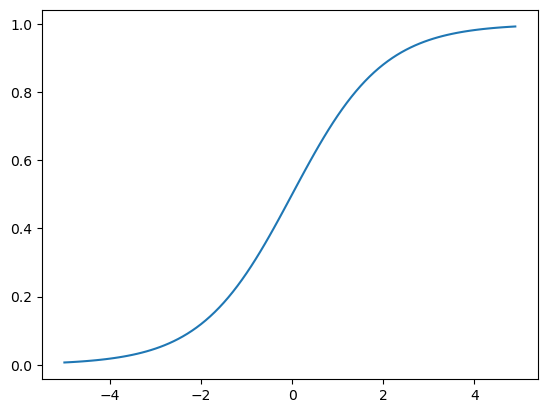

In [56]:
# z값의 크기는 0보다는 크고 1보다는 작다.
# 0.5를 기준으로 그 밑은 음수를, 그 이상으로는 양수를 인수로 받음
# 시그모이드 함수
# S자 모양의 곡선을 그리는 함수. 어떤 숫자를 입력받으면, 그 값을 0과 1 사이의 값으로 바
z = np.arange(-5, 5, 0.1)
phi = 1/ (1+np.exp(-z))

plt.plot(z, phi)
plt.show()

## 로지스틱 회귀로 이진 분류 수행하기

In [59]:
# 불리언 인덱싱을 사용한 예제
# 해당 배열에서 True인 인덱스만 해당하는 값을 선택

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [63]:
# 특정 조건을 만족하는 데이터만 선택하여 새로운 배열을 만드는 예제
# train_scaled와 train_target에서 선택적으로 필터링하여 새로운 배열을 생성하는 과정
# 모델이 'Bream'와 'Smelt' 클래스에 대해서만 학습할 수 있도록 하기 위해서
bream_smelt_indexes = (train_target == 'Bream') | (train_target=='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [67]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [69]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [71]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [73]:
print(lr.classes_)

['Bream' 'Smelt']


In [75]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [77]:
# 로지스틱 회귀 모델을 사용하여 주어진 샘플들에 대한 결정함수(Decision Functin) 값을 계산
# 결정 함수 : 결정 함수(Decision Function)**는 각 샘플에 대해 모델이 예측한 '경계' 값을 나타냄
#            이 값은 각 클래스에 대해 얼마나 멀리 떨어져 있는지, 즉 샘플이 어떤 클래스에 속할지에 대한 확신 정도를 나타냅

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


### decision_function
- 확률이 아니라 결정 경계에 대한 "확신 정도"를 나타냄
- 로지스틱 회귀에서 선형 방정식의 결과(z=(−0.40451732⋅x1)+(−0.57582787⋅x2)+(−0.66248158⋅x3)+(−1.01329614⋅x4)+(−0.73123131⋅x5)−2.16172774)
- 이 값을 시그모이드 함수로 변환하면 확률이 됨

### predict_proba
- 각 클래스에 대한 확률 값을 반환하며
- 모델이 각 샘플을 클래스 0 또는 클래스 1에 속할 확률을 직접적으로 보여줍니다.

### 정리
- predict_proba의 출력이 클래스에 속할 확률을 의미
- decision_function의 값은 그 확률을 예측하기 위한 "기본 값"에 해당

In [81]:
# 로지스틱 회귀의 결정 함수 값(decision function)을 확률로 변환하는 코드
# expit() 함수는 시그모이드 함수의 구현
# expit()은 결정 함수의 결과를 확률 값으로 변환하여, 해당 샘플이 특정 클래스에 속할 확률을 출력
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


### expit(decisions)
단일 클래스 확률입니다. 즉, 각 샘플에 대해 클래스 1에 속할 확률만 반환

### lr.predict_proba(train_bream_smelt[:5])
두 클래스에 대한 확률을 모두 반환

결론
expit(decisions)는 시그모이드 함수를 적용한 후, 각 샘플에 대해 클래스 1에 속할 확률만을 반환합니다.
lr.predict_proba는 클래스 0과 클래스 1에 대한 확률을 모두 반환

## 로지스틱 회귀로 다중 분류 수행하기

In [86]:
# C : 이 파라미터는 정규화 파라미터입니다.
# 로지스틱 회귀에서 C는 규제(regularization) 강도를 조절
# C 값이 클수록 모델이 더 적합하려고 하며, 값이 작을수록 과적합을 방지

# max_iter=1000: 로지스틱 회귀 모델을 훈련시킬 때 반복하는 최대 반복 횟수
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [92]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [94]:
# 각 클레스에 대한 확률
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [98]:
# 클래스 라벨의 순서는 항상 lr.classes_를 통해 확인
# 데이터셋의 클래스 분포에 따라 순서가 달라질 수 있음.
# 모델이 반환하는 확률 값도 이 순서에 맞춰서 각 클래스에 대한 확률이 나열
# 클래스 라벨 순서를 알지 못하면 확률 값이 어떤 클래스에 해당하는지 알기 어려움

print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [100]:
# 다중 클래스 분류(multiclass classification)에서는, 하나의 함수가 아니라, 각 클래스마다 별도의 로지스틱 회귀 함수를 학습
# 각 클래스는 자신만의 회귀 계수와 절편을 가잠

print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [104]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [110]:
proba = softmax(decision, axis =1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


| **구분**               | **시그모이드 (Sigmoid)**                                  | **소프트맥스 (Softmax)**                                  |
|------------------------|----------------------------------------------------------|-----------------------------------------------------------|
| **적용되는 상황**       | 이진 분류 (Binary Classification)                         | 다중 클래스 분류 (Multiclass Classification)               |
| **출력 값**             | 각 샘플에 대해 1개 클래스에 대한 확률                    | 각 샘플에 대해 모든 클래스에 대한 확률                    |
| **입력 값**             | 각 샘플에 대해 단일 결정 값 (1개의 클래스에 대한)        | 각 샘플에 대해 각 클래스에 대한 여러 결정 값             |
| **결과의 합**           | 출력은 단일 확률로 0과 1 사이                             | 모든 클래스에 대한 확률의 합은 1                         |
| **수학적 표현**         | $$\sigma(x) = \frac{1}{1 + e^{-x}}$$                      | $$P(y=k | \mathbf{x}) = \frac{e^{z_k}}{\sum_{i=1}^{C} e^{z_i}}$$ |
| **사용 예시**           | 이진 분류 (예: 스팸/비스팸 분류, 질병 유무 예측)           | 다중 클래스 분류 (예: 동물 분류, 텍스트 분류)             |
| **출력 값의 해석**       | 클래스 1에 속할 확률                                     | 각 클래스에 속할 확률을 비교하여 가장 높은 확률을 가진 클래스를 예측 |
| **확률 범위**           | 0과 1 사이의 확률 (클래스 1에 대한 확률)                  | 0과 1 사이의 확률 (모든 클래스에 대한 확률)                |
| **확률 정규화**         | 정규화 없음: 단일 클래스에 대한 확률만 계산               | 정규화 있음: 모든 클래스 확률의 합은 항상 1               |
| **출력 예시**           | 0.7 (클래스 1에 속할 확률)                               | [0.2, 0.7, 0.1] (각 클래스에 대한 확률)                   |
| **주요 특징**           | - 이진 분류에서 사용                                    | - 다중 클래스 분류에서 사용                                |
|                        | - 확률이 하나만 필요                                    | - 각 클래스의 확률을 계산하고, 전체 확률의 합은 1로 정규화  |
| **일반적인 사용 사례**  | 스팸 필터링, 이진 감정 분석, 질병 예측 등                | 다중 클래스 이미지 분류 (예: 고양이, 개, 새), 텍스트 분류 등 |
